In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

### Load The Dataset

In [4]:
X_train=np.loadtxt('input.csv',delimiter=',')
Y_train=np.loadtxt('labels.csv',delimiter=',')

X_test=np.loadtxt('input.csv',delimiter=',')
Y_test=np.loadtxt('labels_test.csv',delimiter=',')

In [5]:
X_train=X_train.reshape(len(X_train),100,100,3)
Y_train=Y_train.reshape(len(Y_train),1)

X_test=X_test.reshape(len(X_test),100,100,3)
Y_test=Y_test.reshape(len(Y_test),1)

X_train=X_train/255.0
X_test=X_test/255.0

In [6]:
print("Shape of the X_train",X_train.shape)
print("Shape of the Y_train",Y_train.shape)
print("Shape of the X_test",X_test.shape)
print("Shape of the Y_test",Y_test.shape)

Shape of the X_train (2000, 100, 100, 3)
Shape of the Y_train (2000, 1)
Shape of the X_test (2000, 100, 100, 3)
Shape of the Y_test (400, 1)


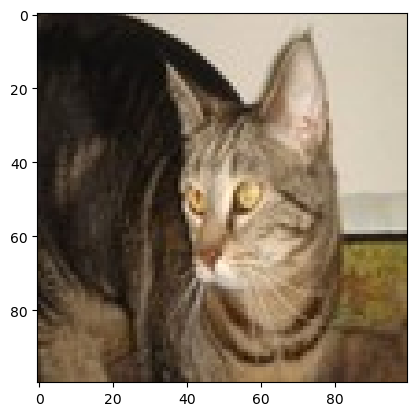

In [8]:
idx=random.randint(0,len(X_train))
plt.imshow(X_train[idx,:])
plt.show()

In [12]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu',input_shape=(100,100,3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [13]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [14]:
model.fit(X_train,Y_train,epochs=5, batch_size=64)

Epoch 1/5


32/32 [==============================] - 12s 249ms/step - loss: 0.6992 - accuracy: 0.5265
Epoch 2/5
32/32 [==============================] - 8s 237ms/step - loss: 0.6451 - accuracy: 0.6280
Epoch 3/5
32/32 [==============================] - 8s 235ms/step - loss: 0.5614 - accuracy: 0.7240
Epoch 4/5
32/32 [==============================] - 8s 236ms/step - loss: 0.5024 - accuracy: 0.7610
Epoch 5/5
32/32 [==============================] - 8s 238ms/step - loss: 0.4384 - accuracy: 0.7885


In [15]:
model.evaluate(X_test,Y_test)

ValueError: Data cardinality is ambiguous:
  x sizes: 2000
  y sizes: 400
Make sure all arrays contain the same number of samples.

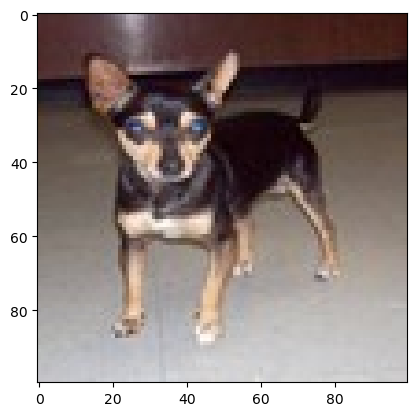

1/1 [==============================] - 0s 78ms/step
Our Model says it is a:  dog


In [29]:
#let us select random test image randomly
idx2=random.randint(0,len(Y_test))
plt.imshow(X_test[idx2,:])
plt.show()

y_pred=model.predict(X_test[idx2,:].reshape(1,100,100,3))
y_pred=y_pred > 0.5

if(y_pred ==0):
    pred='dog'
else:
    pred='cat'

print("Our Model says it is a: ",pred)